<p style="font-family: Arial; font-size:2.75em;color:green; font-style:bold">
Clasificación supervisada<br><br>
Usando scikit-learn
<br><br>
</p>

<h1 style="text-align:center;color:green">Predicción humedad a las 3 pm a partír de los features calculados entre las 8:55 am y 9:04 am por método de árboles de decisión</h1>

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
Importamos Librerías<br></p>

In [1]:
#!pip install sklearn
#!pip install graphviz
#!pip install pydotplus
#!conda install -c anaconda graphviz
#!pip install graphviz
#!pip install nbconvert


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
#from sklearn.externals.six import StringIO 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
import pydotplus 

<h3> Cargamos los datos </h3>

In [3]:
data = pd.read_csv('meteo/diario.csv')

In [4]:
# Numero de datos
data.shape

(1095, 11)

<h3> Caracteristicas a analizar </h3>

In [5]:
#Visualiza las features
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

<h3> Las primeras 10 filas del dataset </h3>

In [50]:
#Muestra las 10 primeras filas
data.head(50)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.000,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.000,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.000,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.000,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.900,14730.0,92.410000,76.740000
5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.020,170.0,35.130000,33.930000
6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.000,0.0,10.657422,21.385657
7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.000,0.0,80.470000,74.920000
8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.000,0.0,29.580000,24.030000
9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.000,0.0,88.600000,68.050000


<h3> Las últimas 10 filas del dataset </h3>

In [7]:
data.tail(10)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
1085,1085,914.84,47.354,190.9,3.713320,204.4,4.652835,0.0,0.0,92.30,88.16
1086,1086,921.26,52.646,261.9,2.035615,260.5,3.042238,0.0,0.0,91.11,81.89
1087,1087,914.00,66.650,173.8,8.366156,181.0,9.439887,0.0,0.0,30.92,47.34
1088,1088,912.90,71.870,129.2,1.431642,160.0,2.057985,0.0,0.0,51.84,55.49
1089,1089,915.00,55.040,191.8,5.368656,220.9,7.068730,0.0,0.0,73.55,69.67
1090,1090,918.90,63.104,192.9,3.869906,207.3,5.212070,0.0,0.0,26.02,38.18
1091,1091,918.71,49.568,241.6,1.811921,227.4,2.371156,0.0,0.0,90.35,73.34
1092,1092,916.60,71.096,189.3,3.064608,200.8,3.892276,0.0,0.0,45.59,52.31
1093,1093,912.60,58.406,172.7,3.825167,189.1,4.764682,0.0,0.0,64.84,58.28
1094,1094,921.53,77.702,97.1,3.265932,125.9,4.451511,0.0,0.0,14.56,15.10


<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
Limpieza y depuración de la información <br><br></p>
Comenzamos a revisar la información y a limpiar información inservible, también revisamos que variables nos interesan

In [8]:
data[data.isnull().any(axis=1)] #selecciono filas  (f i l a s por eso uso axis=1) que tengan valores null

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


<h3>Comenzamos borrando los valores nulos y eliminamos la columna number que no nos serviría para el ejercicio...</h3>

In [9]:
data = data.dropna() #Elimina los valores nulos
del data['number'] #borro la columna number ya que no la necesito

In [10]:
data.head(10)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


In [11]:
data.shape

(1064, 10)

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
Metodo de Clasificación <br><br></p>
Binarizamos la variable objetivo (target) relative_humidity_3pm a 0 o 1 para predecir si hay alta o baja humedad, se considera alta los datos > a 24.99 y baja los menores o iguales.<br>

In [12]:
#copiamos los datos depurados.
clean_data = data.copy()
#Creamos una nueva columna Humedad_alta_baja con informacion del 
#dato objetivo pero binario para datos >24.99 = 1 y los demas 0
clean_data['Humedad_alta_baja'] = (clean_data['relative_humidity_3pm'] > 24.99)*1 
print(clean_data['Humedad_alta_baja'])

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: Humedad_alta_baja, Length: 1064, dtype: int32


<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
El objetivo lo guardamos en 'y'.
<br><br></p>

In [13]:
y=clean_data[['Humedad_alta_baja']].copy()
y

,Humedad_alta_baja
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


In [14]:
clean_data['relative_humidity_3pm']

0       36.160000
1       19.426597
2       14.460000
3       12.742547
4       76.740000
          ...    
1090    38.180000
1091    73.340000
1092    52.310000
1093    58.280000
1094    15.100000
Name: relative_humidity_3pm, Length: 1064, dtype: float64

In [15]:
y.head(10)

,Humedad_alta_baja
0,1
1,0
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,1


<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
Ahora tomamos las caracteristicas de los sensores tomadas a las 9 am para predecir la humedad a las 3 pm
<br></p>

In [16]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am','rain_duration_9am'
        ]

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
Guardamos las caracteristicas en 'X' que son las features con que se entrena el modelo.
<br></p>

In [17]:
X = clean_data[morning_features].copy()

In [18]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [19]:
y.columns

Index(['Humedad_alta_baja'], dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
Realizamos la partición de nuestro set de datos en set de entrenamiento y prueba<br></p>
<h3>Separamos los datos de entrenamiento y de prueba, manejando una relación de 70% de entrenamiento y 30% para prueba<br></h3>

In [20]:
# Se esta reservando 30% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=324)

In [21]:
#type(X_train)
#type(X_test)
#type(y_train)
#type(y_test)
#X_train.head()
#y_train.describe()

<h3>Comenzamos con el ajuste y entrenamiento del modelo, al cual le pasamos los datos de entrenamiento...</h3>


In [22]:
#creo el clasificador
clasificador_humedad = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
#Ajustamos el modelo con el metodo fit, las caracteristicas (X) y el objetivo (y)
#X_train Estos son los datos
#y_train Esto es lo que deseo obtener
clasificador_humedad.fi t(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [23]:
type(clasificador_humedad)

sklearn.tree.tree.DecisionTreeClassifier

<h3>PREDICCIONES</h3>
<h3>Ahora le pasamos todas las variables de prueba (X_test) a predictions y por medio de la funcion de clasificación, se crea el arbol binario</h3>

In [24]:
predictions = clasificador_humedad.predict(X_test)
X_test

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
456,918.800000,80.384000,189.600000,1.767183,80.300000,2.773806,0.0,0.0
845,921.613373,68.658973,70.703555,2.248932,96.844701,3.043049,0.0,0.0
693,917.900000,76.802000,154.100000,2.550112,199.400000,3.400149,0.0,0.0
259,914.830000,74.570000,175.500000,1.409272,153.800000,2.236940,0.0,0.0
723,917.010000,51.836000,130.200000,1.610597,159.900000,2.348787,0.0,0.0
...,...,...,...,...,...,...,...,...
853,917.300000,73.184000,178.600000,4.675205,183.700000,5.256809,0.0,0.0
883,918.600000,64.382000,177.100000,2.460634,190.700000,3.064608,0.0,0.0
503,919.738161,67.432744,147.470882,1.157775,129.981819,1.899000,0.0,0.0
776,920.897662,66.528786,198.122180,4.079293,210.715249,4.842644,0.0,0.0


In [36]:
predictions

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

<h3>RESULTADOS</h3>

In [71]:
y_test['Humedad_alta_baja']

456    0
845    0
693    1
259    1
723    1
      ..
853    1
883    1
503    0
776    0
391    0
Name: Humedad_alta_baja, Length: 320, dtype: int32

In [33]:
comp = pd.DataFrame({'real': y_test, 'predicciones' : predictions})

ValueError: Shape of passed values is (1, 2), indices imply (320, 2)

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
Medimos la precisión
<br><br></p>
Si comparamos los resultados y las predicciones uno a uno podemos notar que los resultados son similares solo cambia en algunos casos pero para ser más precisos se puede medir precisión por medio de la siguiente función.


In [31]:
#podemos medir que tan bien o mal esta funcionando el modelo
accuracy_score(y_test, predictions)

0.825

El modelo tiene una presicion de 82.5% se puede buscar mejorar este porcentaje modificando el numero de nodos cuando se realiza en ajuste y entrenamiento del modelo DecisionTreeClassifier. (El valor de presicion dado es para un arbol de 10 nodos).  Tambien se pueden revisar columnas que estan en ceros y se descartan.  En estse parte se pueden realizar diferentes pruebas para ver si se puede mejorar la precisión.

In [28]:
y_test.shape

(320, 1)

In [29]:
predictions.shape

(320,)

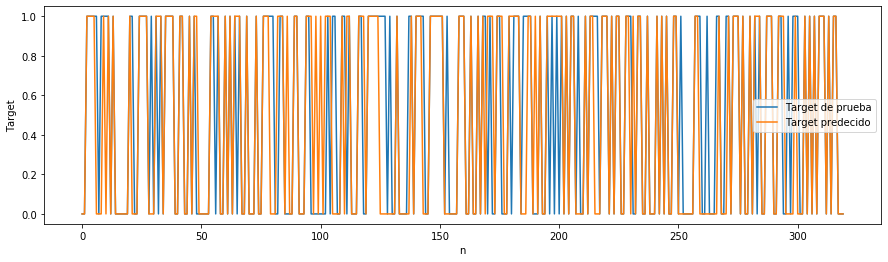

In [30]:
import numpy as np
n = len(y_test)
t = np.array(range(n))
plt.figure(figsize=(15, 4))
plt.plot(t, y_test, label="Target de prueba")
plt.plot(t, predictions, label="Target predecido")
plt.legend()
plt.xlabel("n")
plt.ylabel("Target")
plt.show()

## BIBLIOGRAFIA

https://www.udemy.com/course/mlmasterclass/learn/lecture/14956362#overview
https://sitiobigdata.com/2019/12/14/arboles-de-decision-en-machine-learning-parte-2/

# GRAFICO DE HUMEDAD RELATIVA A LAS 9:00 a.m
Este grafico muestra como se distriuyen los datos de humedad relativa a las 9:00 am a lo largo de los dias evaluados 

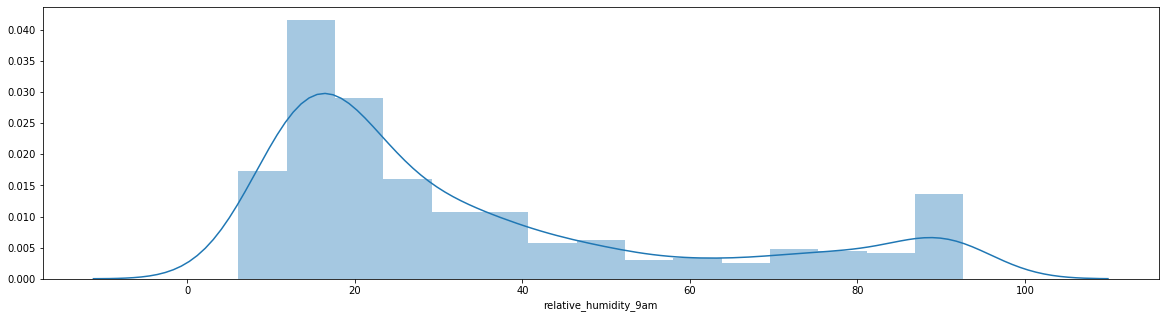

In [51]:
fig, ax=plt.subplots(figsize=(20,5))
sns.distplot(data.iloc[:,8])

# GRAFICO DE HUMEDAD RELATIVA A LAS 3:00 p.m
Este grafico muestra como se distriuyen los datos de la humedad relativa a las 3:00pm a lo largo de los dias evaluados 

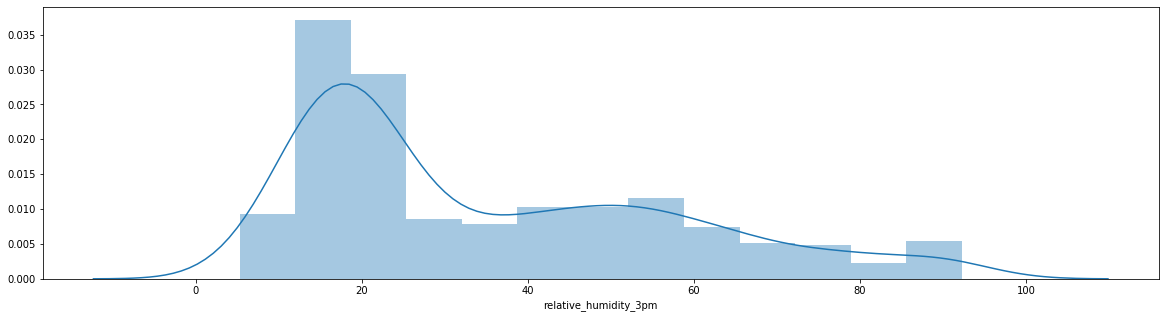

In [53]:
fig, ax=plt.subplots(figsize=(20,5))
sns.distplot(data.iloc[:,9])

In [61]:
y_test

,Humedad_alta_baja
456,0
845,0
693,1
259,1
723,1
...,...
853,1
883,1
503,0
776,0


## Numero de días con humedad relativa alta y baja (Datos de entrada)
Para los datos de entrada se identifica que el 50,28% de los días son de humedad baja y el 49,72% son de humedad alta.  Es decir que estan en una proporcion equivalente.

In [99]:
total = (y[y==0].count())+(y[y==1].count())
ceros = y[y==0].count()
unos = y[y==1].count()

In [100]:
#Numero de días con humedad relativa baja datos originales
print(total)

Humedad_alta_baja    1064
dtype: int64


In [95]:
#Numero de días con humedad relativa baja datos originales
print(ceros)

Humedad_alta_baja    535
dtype: int64


In [94]:
#Numero de días con humedad relativa alta datos originales
print(unos)

Humedad_alta_baja    529
dtype: int64


## Gráfico de número de días con humedad relativa alta y baja (datos originales)

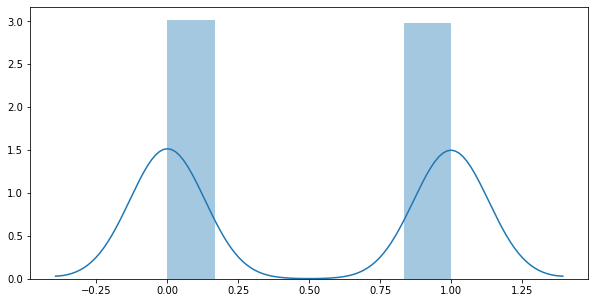

In [76]:
fig, ax=plt.subplots(figsize=(10,5))
sns.distplot(y)

## Numero de días con humedad relativa alta y baja (Datos Pronosticados)
Para los datos de entrada se identifica que el 49,68% de los días son de humedad baja y el 50,31% son de humedad alta.  Es decir que estan en una proporcion equivalente.

In [101]:
total = (y_test[y==0].count())+(y_test[y_test==1].count())
ceros = y_test[y_test==0].count()
unos = y_test[y_test==1].count()

In [102]:
#Numero de días con humedad relativa baja datos originales
print(total)

Humedad_alta_baja    320
dtype: int64


In [103]:
#Numero de días con humedad relativa baja datos originales
print(ceros)

Humedad_alta_baja    159
dtype: int64


In [104]:
#Numero de días con humedad relativa alta datos originales
print(unos)

Humedad_alta_baja    161
dtype: int64


## Gráfico de número de días con humedad relativa alta y baja (datos originales)

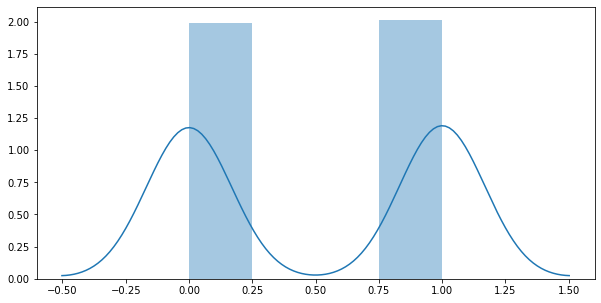

In [106]:
fig, ax=plt.subplots(figsize=(10,5))
sns.distplot(y_test)